# Part 1: Data preprocessing

Dtaset link: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data?select=train.csv

# Importing the libraries and dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dataset = pd.read_csv('/content/train.csv')

# Data exploration

In [ ]:
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
dataset.shape

(1460, 81)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
dataset.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
# statical summary
dataset.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [ ]:
dataset.select_dtypes(include=['int64', 'float64']).columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [ ]:
len(dataset.select_dtypes(include=['int64', 'float64']).columns)

38

In [ ]:
# categorical columns
dataset.select_dtypes(include='object').columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [ ]:
len(dataset.select_dtypes(include='object').columns)

43

# Dealing with the null values

In [ ]:
dataset.isnull().values.any()

np.True_

In [ ]:
dataset.isnull().values.sum()

np.int64(7829)

In [ ]:
dataset.isnull().sum()

,0
Id,0
MSSubClass,0
MSZoning,0
LotFrontage,259
LotArea,0
...,...
MoSold,0
YrSold,0
SaleType,0
SaleCondition,0


In [ ]:
# columns with null values
dataset.columns[dataset.isnull().any()]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [ ]:
len(dataset.columns[dataset.isnull().any()])

19

<function matplotlib.pyplot.show(close=None, block=None)>

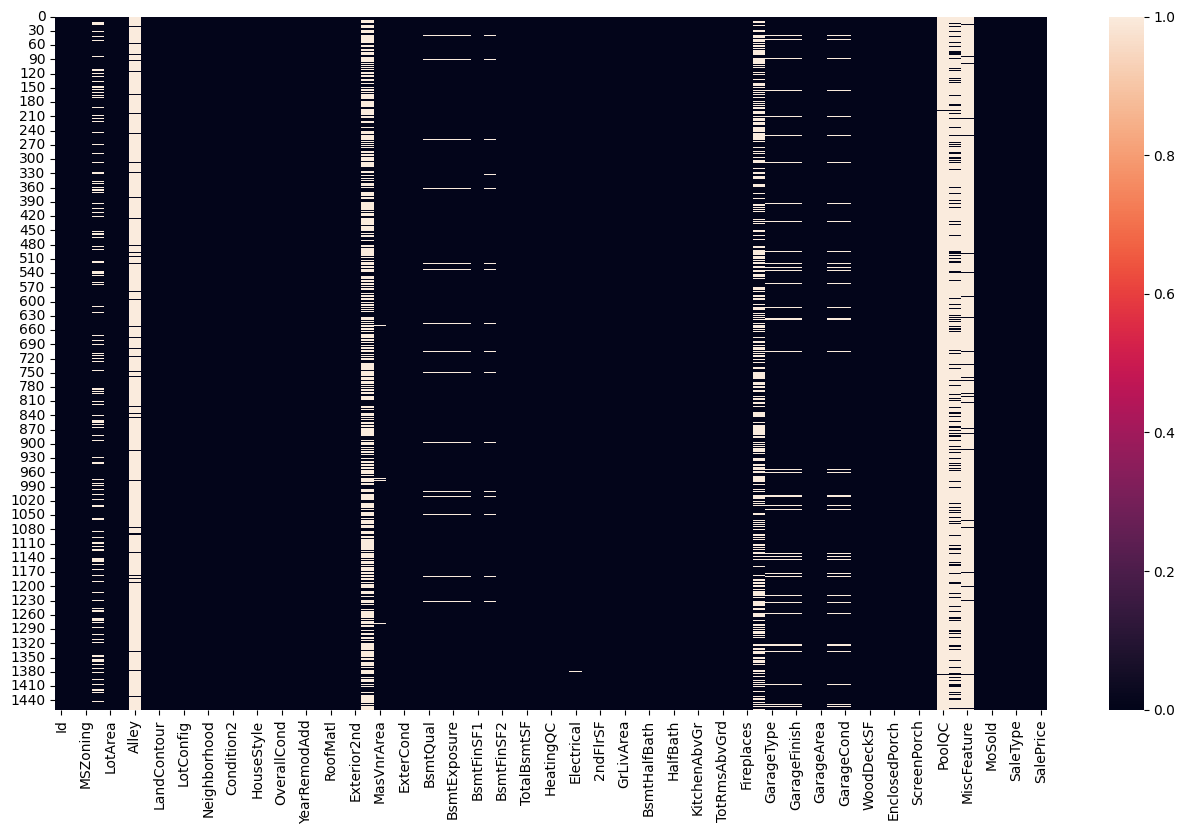

In [ ]:
# null values with heatmap
plt.figure(figsize=(16, 9))
sns.heatmap(dataset.isnull())
plt.show

In [ ]:
dataset.shape

(1460, 81)

In [ ]:
null_percent = dataset.isnull().sum() / dataset.shape[0] * 100

# (missing values / total values) * 100

In [ ]:
null_percent

,0
Id,0.000000
MSSubClass,0.000000
MSZoning,0.000000
LotFrontage,17.739726
LotArea,0.000000
...,...
MoSold,0.000000
YrSold,0.000000
SaleType,0.000000
SaleCondition,0.000000


In [ ]:
# columns to drop ( more thean 50% null values)
cols_to_drop = null_percent[null_percent > 50].keys()

In [ ]:
cols_to_drop

Index(['Alley', 'MasVnrType', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')

In [ ]:
dataset = dataset.drop(columns=['Alley', 'MasVnrType', 'PoolQC', 'Fence', 'MiscFeature'])

In [ ]:
dataset.shape

(1460, 76)

In [ ]:
# columns with null values
dataset.columns[dataset.isnull().any()]

Index(['LotFrontage', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual',
       'GarageCond'],
      dtype='object')

In [ ]:
len(dataset.columns[dataset.isnull().any()])

14

**Add columns mean to numerical columns**

In [ ]:
# numerical coulmns
# 'LotFrontage', 'MasVnrArea','GarageYrBlt'

In [ ]:
dataset['LotFrontage'] = dataset['LotFrontage'].fillna(dataset['LotFrontage'].mean())
dataset['MasVnrArea'] = dataset['MasVnrArea'].fillna(dataset['MasVnrArea'].mean())
dataset['GarageYrBlt'] = dataset['GarageYrBlt'].fillna(dataset['GarageYrBlt'].mean())

In [ ]:
len(dataset.columns[dataset.isnull().any()])

11

**Add columns mode to categorical columns**

In [ ]:
dataset.select_dtypes(include='object').columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [ ]:
dataset.columns[dataset.isnull().any()]

Index(['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond'],
      dtype='object')

In [ ]:
len(dataset.columns[dataset.isnull().any()])

11

In [ ]:
dataset['BsmtQual'] = dataset['BsmtQual'].fillna(dataset['BsmtQual'].mode()[0])
dataset['BsmtCond'] = dataset['BsmtCond'].fillna(dataset['BsmtCond'].mode()[0])
dataset['BsmtExposure'] = dataset['BsmtExposure'].fillna(dataset['BsmtExposure'].mode()[0])
dataset['BsmtFinType1'] = dataset['BsmtFinType1'].fillna(dataset['BsmtFinType1'].mode()[0])
dataset['BsmtFinType2'] = dataset['BsmtFinType2'].fillna(dataset['BsmtFinType2'].mode()[0])
dataset['Electrical'] = dataset['Electrical'].fillna(dataset['Electrical'].mode()[0])
dataset['FireplaceQu'] = dataset['FireplaceQu'].fillna(dataset['FireplaceQu'].mode()[0])
dataset['GarageType'] = dataset['GarageType'].fillna(dataset['GarageType'].mode()[0])
dataset['GarageFinish'] = dataset['GarageFinish'].fillna(dataset['GarageFinish'].mode()[0])
dataset['GarageQual'] = dataset['GarageQual'].fillna(dataset['GarageQual'].mode()[0])
dataset['GarageCond'] = dataset['GarageCond'].fillna(dataset['GarageCond'].mode()[0])

In [ ]:
len(dataset.columns[dataset.isnull().any()])

0

In [ ]:
dataset.columns[dataset.isnull().any()]

Index([], dtype='object')

In [ ]:
dataset.isnull().values.any()

np.False_

# Distplot

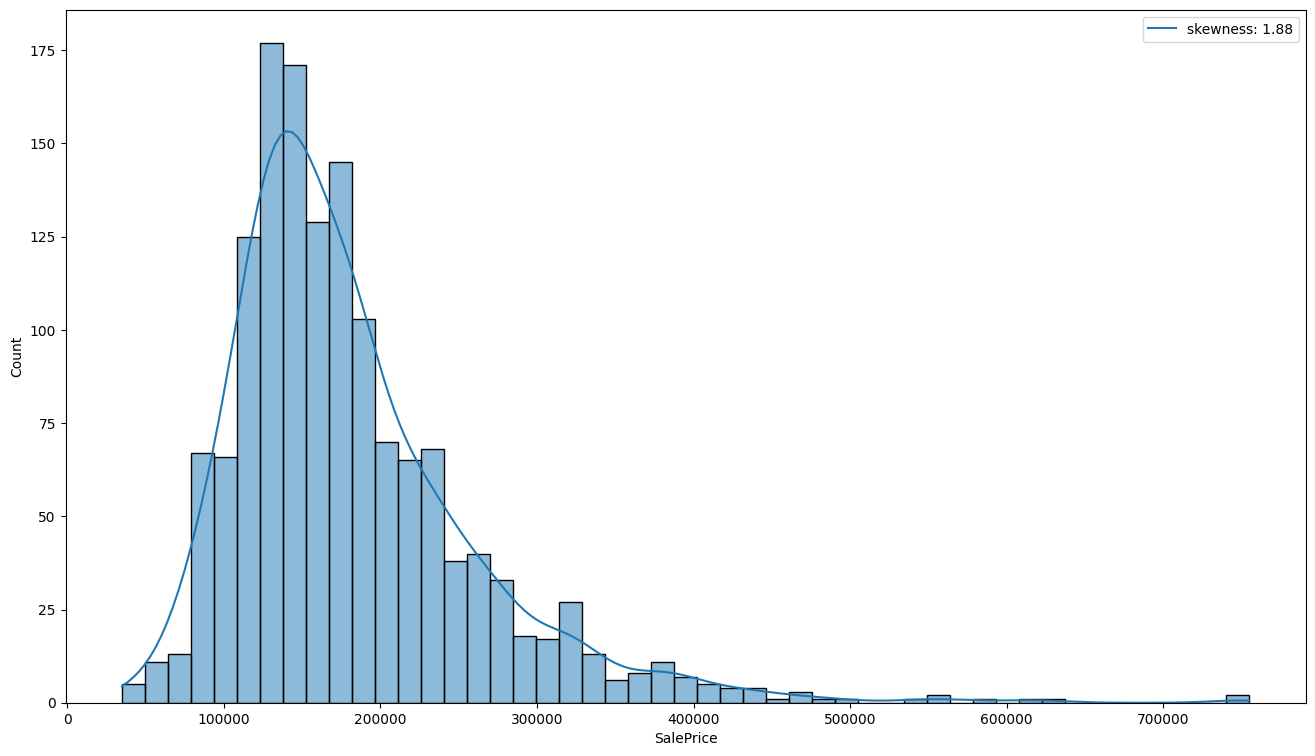

In [ ]:
# distplot of the target variable

plt.figure(figsize=(16,9))
bar = sns.histplot(dataset['SalePrice'], kde=True)
bar.legend(["skewness: {:.2f}".format(dataset['SalePrice'].skew())])
plt.show()

# Correlation matrix

In [ ]:
dataset_2 = dataset.drop(columns='SalePrice')

In [ ]:
dataset_2.shape

(1460, 75)

<Axes: title={'center': 'Correlated with SalePrice'}>

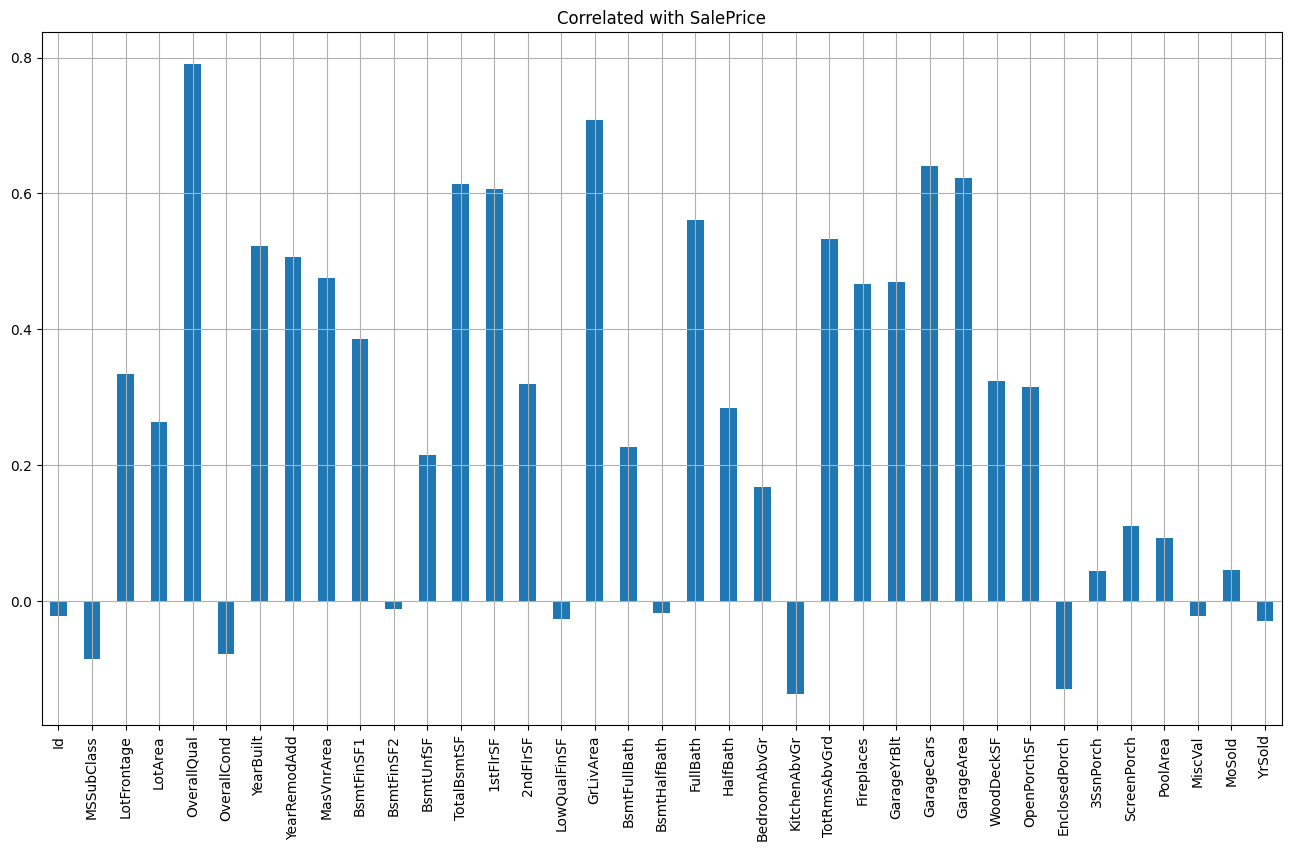

In [ ]:
dataset_2.select_dtypes(include=['number']) \
    .corrwith(dataset['SalePrice']) \
    .plot.bar(
        figsize=(16, 9),
        title='Correlated with SalePrice',
        grid=True
    )

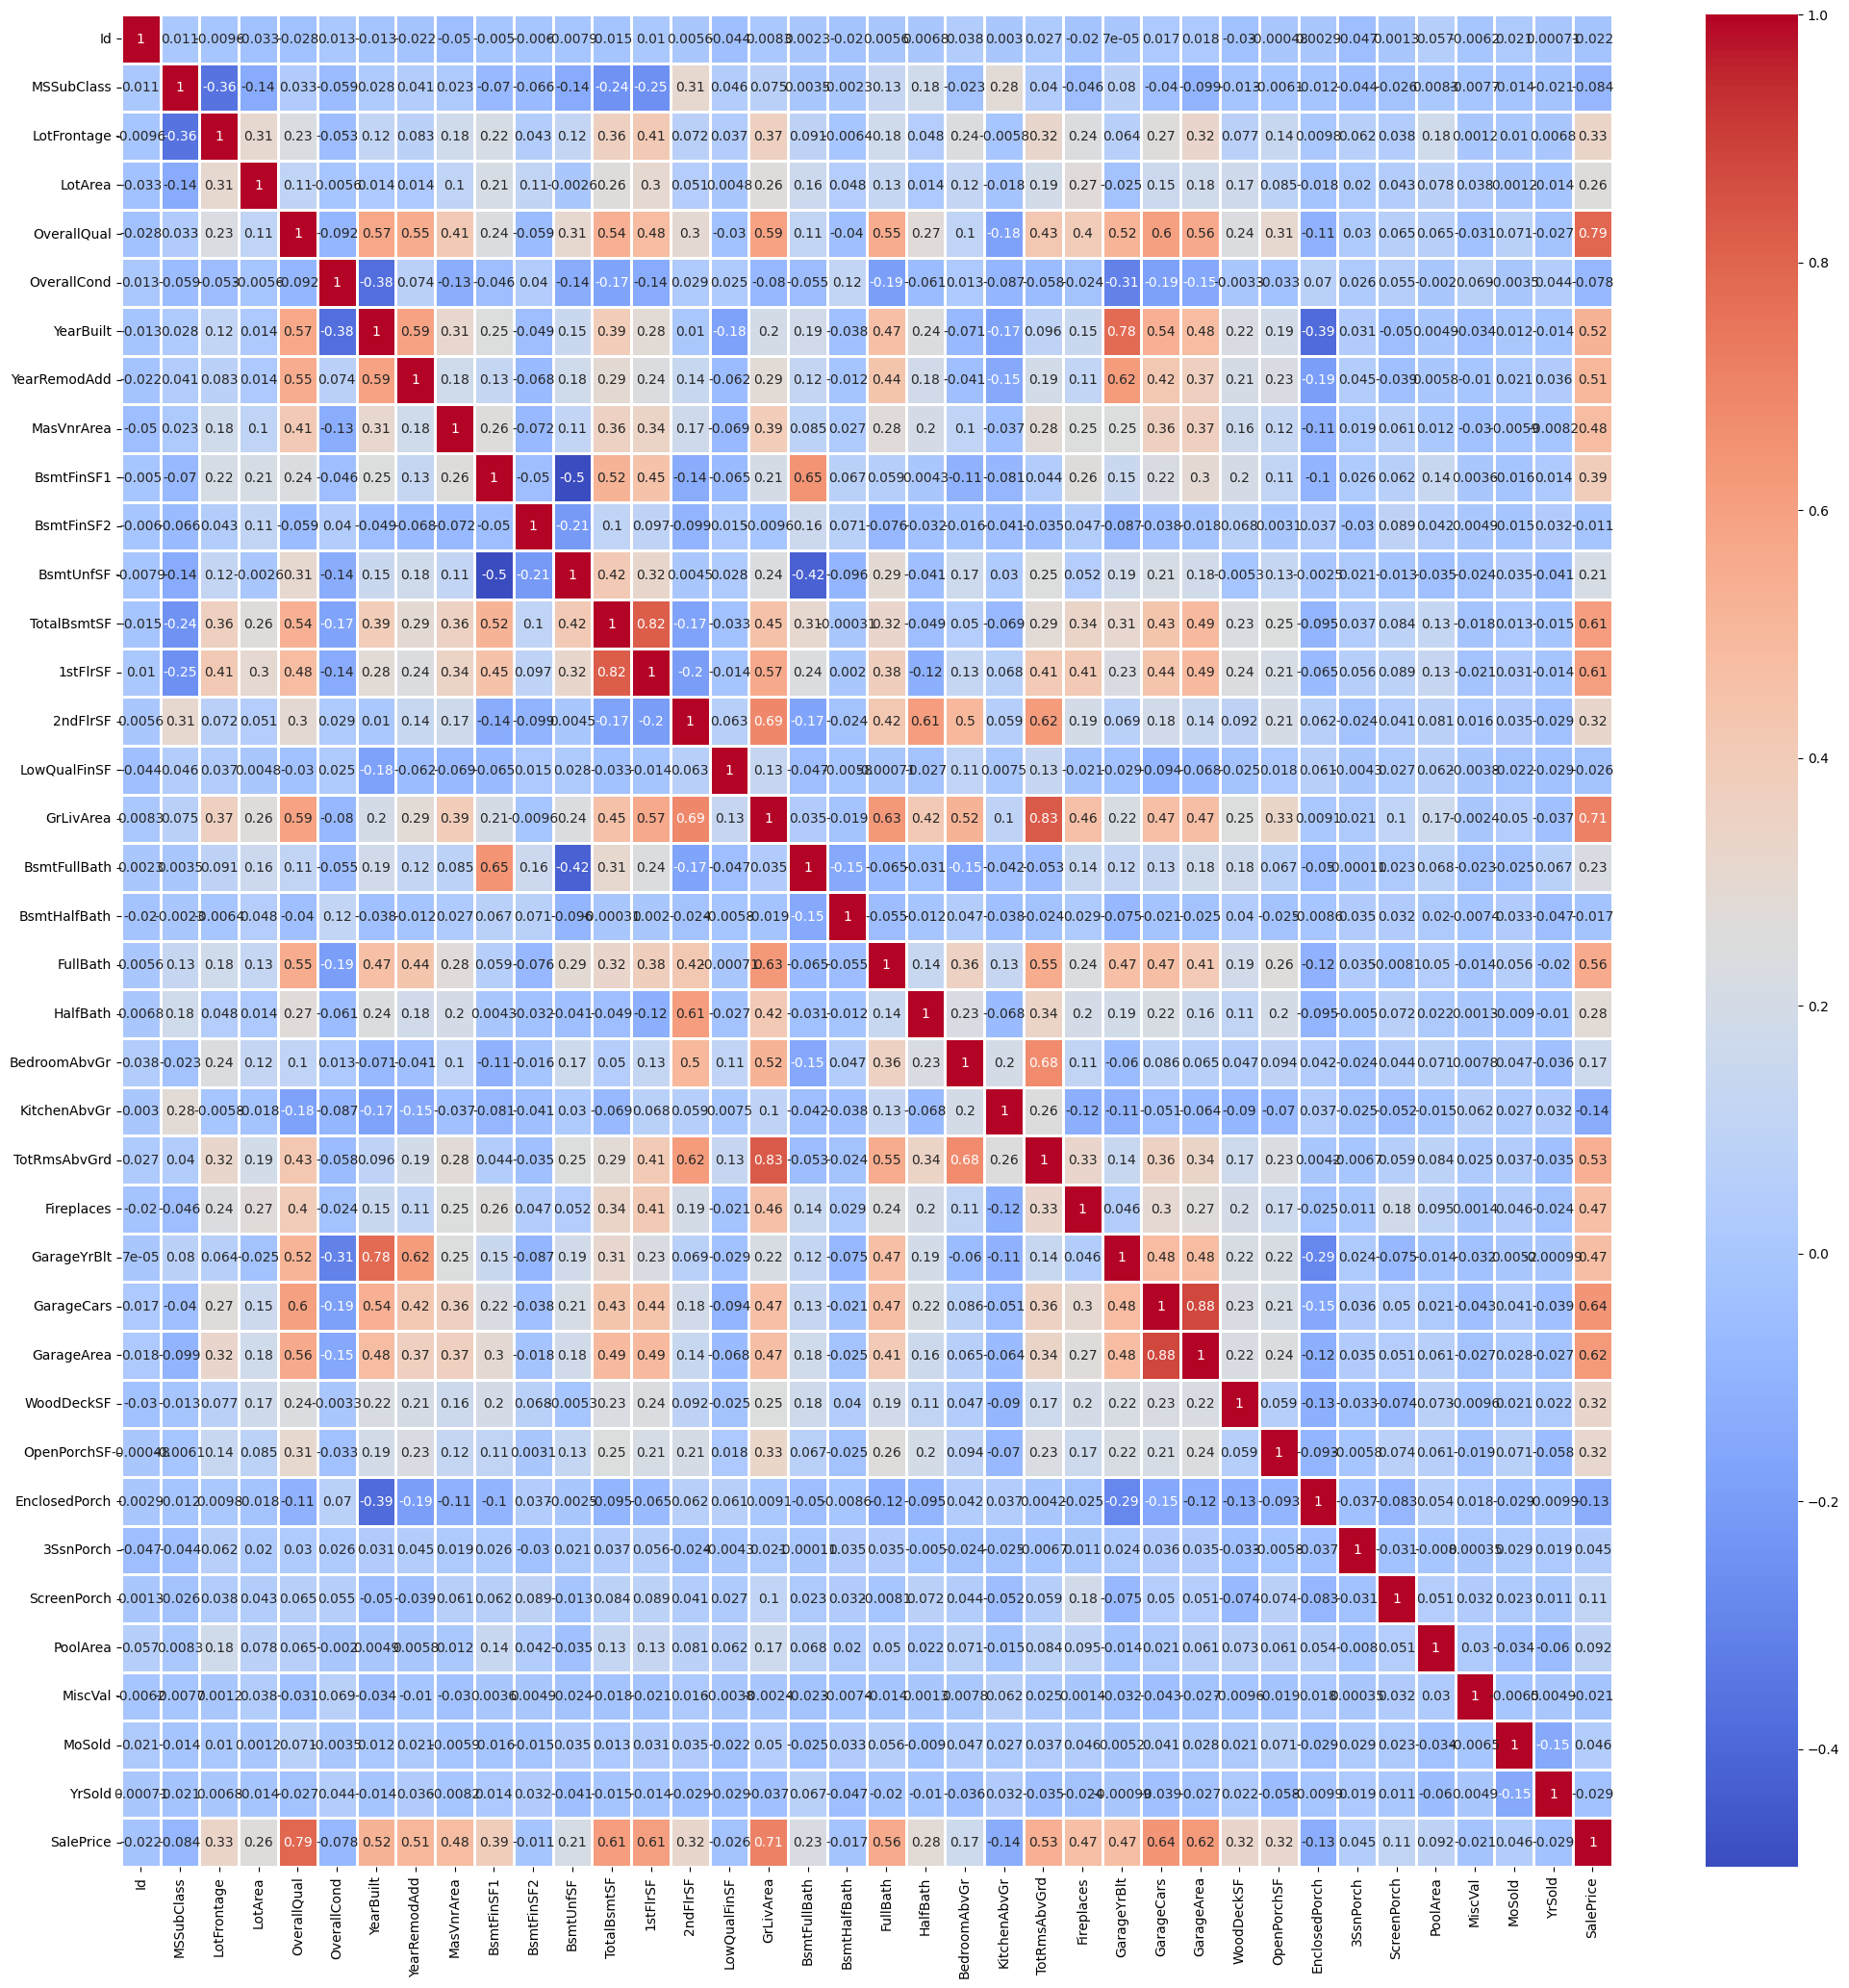

In [ ]:
# heatmap
plt.figure(figsize=(25, 25))
ax = sns.heatmap(
    data=dataset.select_dtypes(include=['number']).corr(),
    cmap='coolwarm',
    annot=True,
    linewidth=2
)

In [ ]:
numeric_df = dataset.select_dtypes(include=['number'])
high_corr = numeric_df.corr()

In [ ]:
high_corr_features = high_corr.index[abs(high_corr['SalePrice']) > 0.5]

In [ ]:
high_corr_features

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea',
       'SalePrice'],
      dtype='object')

In [ ]:
len(high_corr_features)

11

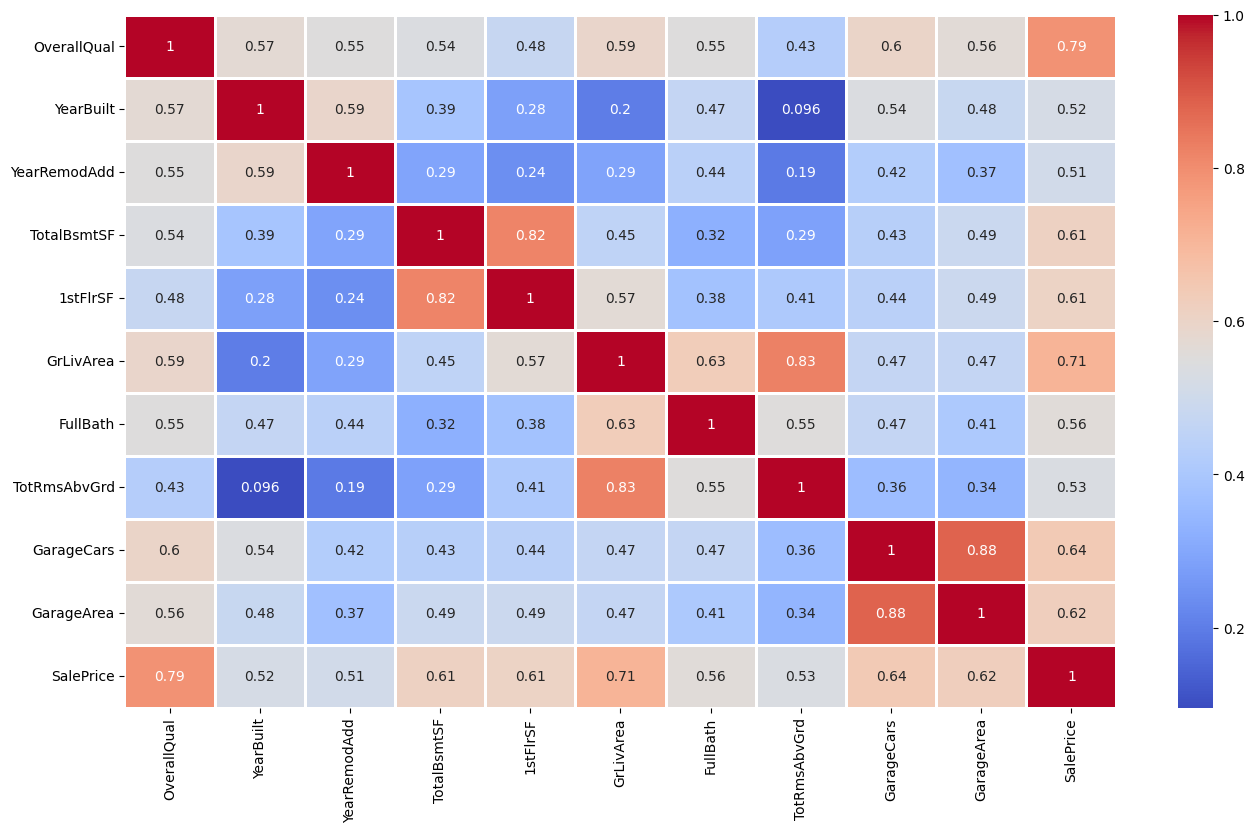

In [ ]:
# heatmap
plt.figure(figsize=(16, 9))
ax = sns.heatmap(
    data=dataset[high_corr_features].select_dtypes(include=['number']).corr(),
    cmap='coolwarm',
    annot=True,
    linewidth=2
)

# Dealing with the categoricalvalues

In [ ]:
dataset.shape

(1460, 76)

In [ ]:
# categorical columns
dataset.select_dtypes(include='object').columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [ ]:
len(dataset.select_dtypes(include='object').columns)

38

In [ ]:
dataset = pd.get_dummies(data=dataset, drop_first=True)

In [ ]:
dataset.shape

(1460, 235)

In [ ]:
dataset.select_dtypes(include='object').columns

Index([], dtype='object')

In [ ]:
len(dataset.select_dtypes(include='object').columns)

0

# Splitting the dataset

In [ ]:
# independent / Matrix of features
x = dataset.drop(columns='SalePrice')

In [ ]:
# target/dependent variable
y = dataset['SalePrice']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=0 )

In [ ]:
x_train.shape

(1168, 234)

In [ ]:
x_test.shape

(292, 234)

In [ ]:
y_train.shape

(1168,)

In [ ]:
y_test.shape

(292,)

# Feature scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
x_train

array([[-0.28399978, -0.86836547,  0.9786782 , ..., -0.10188534,
        -2.20665963,  3.30429529],
       [ 0.31396549, -0.86836547, -0.46715589, ..., -0.10188534,
         0.45317365, -0.30263639],
       [-1.53213363, -0.63114155,  0.4967335 , ..., -0.10188534,
         0.45317365, -0.30263639],
       ...,
       [ 1.13498129,  0.79220197, -0.08160014, ..., -0.10188534,
         0.45317365, -0.30263639],
       [-0.42399958,  1.50387373,  0.01719652, ..., -0.10188534,
         0.45317365, -0.30263639],
       [-0.12738983,  0.08053021, -0.56354483, ..., -0.10188534,
         0.45317365, -0.30263639]])

In [ ]:
x_test

array([[-0.49518592, -0.86836547,  0.01719652, ..., -0.10188534,
        -2.20665963, -0.30263639],
       [-0.58535529, -0.15669371,  0.44853903, ..., -0.10188534,
         0.45317365, -0.30263639],
       [-0.66128739, -0.15669371,  0.01719652, ..., -0.10188534,
         0.45317365, -0.30263639],
       ...,
       [ 1.54074343, -0.15669371, -0.46715589, ...,  9.81495458,
        -2.20665963, -0.30263639],
       [ 1.38887924, -0.63114155, -0.94910059, ..., -0.10188534,
         0.45317365, -0.30263639],
       [-1.60569284,  0.43636609, -0.46715589, ..., -0.10188534,
         0.45317365, -0.30263639]])

# Part 2: Building the Model

# 1) Multiple linear regression

In [ ]:
from sklearn.linear_model import LinearRegression
regressor_mlr = LinearRegression()
regressor_mlr.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_pred = regressor_mlr.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.5799925396726069

# Random Forest regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor_rf = RandomForestRegressor()
regressor_rf.fit(x_train, y_train)

RandomForestRegressor()

In [ ]:
y_pred = regressor_rf.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8376453604788541

# 3) XGBoost regeression

In [ ]:
from xgboost import XGBRegressor
regressor_xgb = XGBRegressor()
regressor_xgb.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
y_pred = regressor_xgb.predict(x_test)

In [ ]:
r2_score(y_test, y_pred)

0.8272401690483093

# Part 3 : Hyper parameter tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
parameters = {
    'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000],
    'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False]
}

In [ ]:
parameters

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4],
 'max_features': ['auto', 'sqrt'],
 'bootstrap': [True, False]}

In [ ]:
random_cv = RandomizedSearchCV(
    estimator=regressor_rf,
    param_distributions=parameters,
    n_iter=50,
    cv=5,
    verbose=2,
    random_state=0,
    n_jobs=-1
)

In [ ]:
random_cv.fit(x_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
110 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
71 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.12/dist-packages/sklearn/utils

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=0, verbose=2)

In [ ]:
random_cv.best_estimator_

RandomForestRegressor(bootstrap=False, max_depth=50, max_features='sqrt',
                      n_estimators=1200)

In [ ]:
random_cv.best_params_

{'n_estimators': 1200,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 50,
 'bootstrap': False}

# Part 4 : Final Model (Random forest regressor)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(bootstrap=False, max_depth=50, max_features='sqrt',
                      n_estimators=1200)
regressor.fit(x_train, y_train)

RandomForestRegressor(bootstrap=False, max_depth=50, max_features='sqrt',
                      n_estimators=1200)

In [ ]:
y_pred = regressor.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.840515126670857